In [18]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [19]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

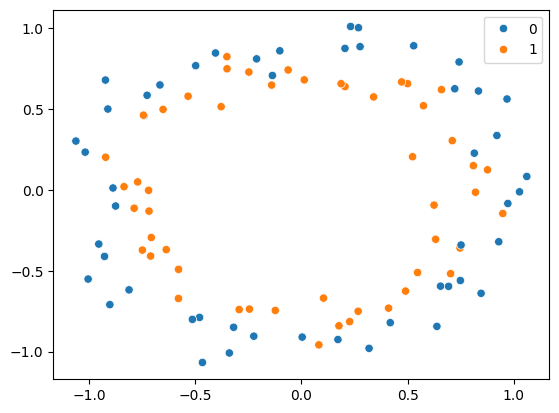

In [21]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [23]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               768       
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

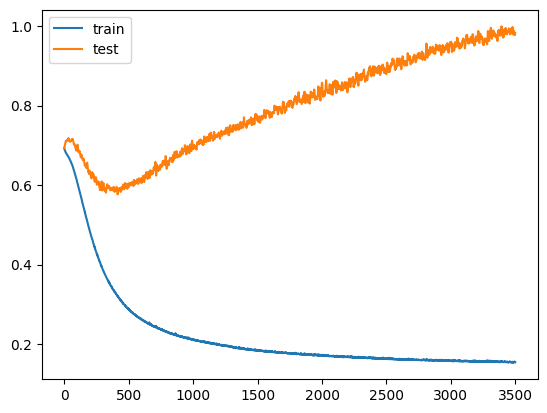

In [27]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 19s 2ms/step


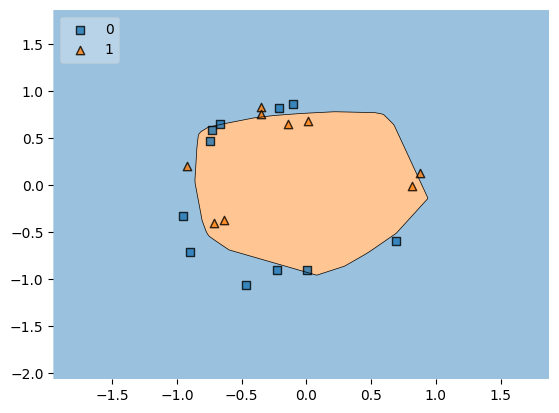

In [28]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

In [29]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 121ms/step - loss: 0.6961 - accuracy: 0.5125 - val_loss: 0.7082 - val_accuracy: 0.3500
Epoch 2/3500
3/3 [==============================] - 0s 23ms/step - loss: 0.6933 - accuracy: 0.5250 - val_loss: 0.7082 - val_accuracy: 0.2500
Epoch 3/3500
3/3 [==============================] - 0s 22ms/step - loss: 0.6911 - accuracy: 0.5500 - val_loss: 0.7081 - val_accuracy: 0.3500
Epoch 4/3500
3/3 [==============================] - 0s 31ms/step - loss: 0.6905 - accuracy: 0.5250 - val_loss: 0.7086 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6891 - accuracy: 0.5250 - val_loss: 0.7100 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 35ms/step - loss: 0.6884 - accuracy: 0.5375 - val_loss: 0.7115 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 29ms/step - loss: 0.6873 - accuracy: 0.5500 - val_loss: 0.7117 - val_accuracy: 0.4500
Epoch 8/3500

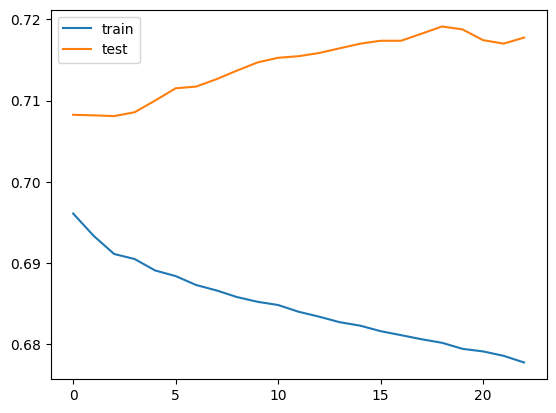

In [17]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()